In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sales data from a CSV file
data =pd.read_csv("c:\delhivery_data.txt")

In [4]:
print(data.head())
print(data.info())

       data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VU

In [5]:
# Group the data by 'trip_uuid' and calculate aggregated statistics
aggregated_data = data.groupby('trip_uuid').agg({
    'actual_time': 'mean',
    'osrm_time': 'mean',
    'osrm_distance': 'mean',
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean',
    'segment_osrm_distance': 'mean',
    'source_name': 'first',
    'destination_name': 'first',
    # Add more aggregation as needed
}).reset_index()

# Display the first few rows of the aggregated data
print("Aggregated Data:")
print(aggregated_data.head())


Aggregated Data:
                 trip_uuid  actual_time   osrm_time  osrm_distance  \
0  trip-153671041653548748   402.102564  199.666667     271.224736   
1  trip-153671042288605164    44.333333   23.333333      29.936756   
2  trip-153671043369099517  1260.955056  738.966292    1005.025267   
3  trip-153671046011330457    41.000000   12.000000      15.823750   
4  trip-153671052974046625    79.428571   29.571429      38.041629   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0            39.692308          25.846154              33.858290   
1            15.666667           7.222222               9.354378   
2            37.168539          21.808989              28.598515   
3            29.500000           8.000000               9.938300   
4            48.571429          16.428571              20.970271   

                          source_name                    destination_name  
0  Bhopal_Trnsport_H (Madhya Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)  
1

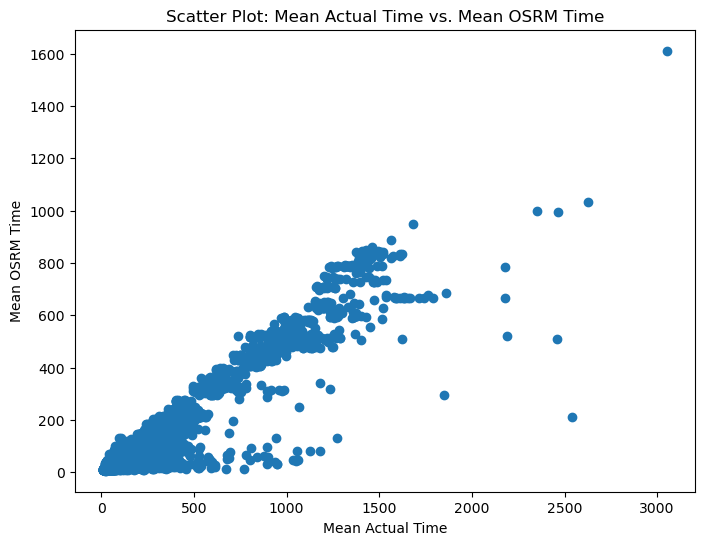

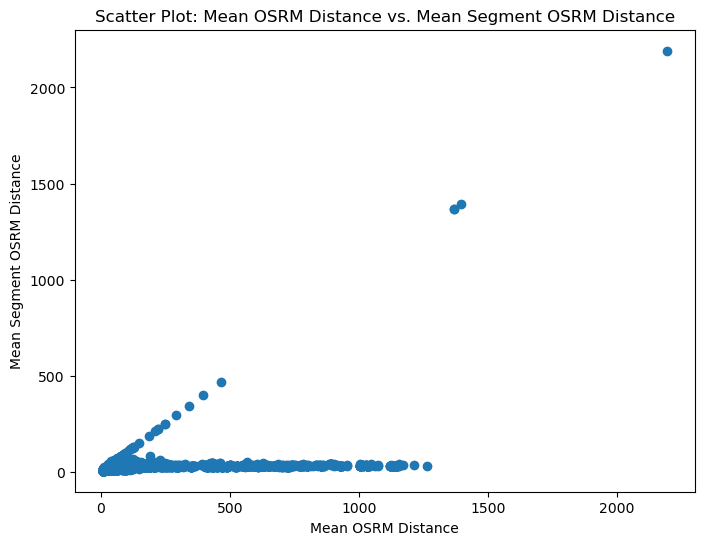

In [6]:
# Scatter plot to visualize the relationship between mean 'actual_time' and mean 'osrm_time'
plt.figure(figsize=(8, 6))
plt.scatter(aggregated_data['actual_time'], aggregated_data['osrm_time'])
plt.xlabel('Mean Actual Time')
plt.ylabel('Mean OSRM Time')
plt.title('Scatter Plot: Mean Actual Time vs. Mean OSRM Time')
plt.show()

# Scatter plot to visualize the relationship between mean 'osrm_distance' and mean 'segment_osrm_distance'
plt.figure(figsize=(8, 6))
plt.scatter(aggregated_data['osrm_distance'], aggregated_data['segment_osrm_distance'])
plt.xlabel('Mean OSRM Distance')
plt.ylabel('Mean Segment OSRM Distance')
plt.title('Scatter Plot: Mean OSRM Distance vs. Mean Segment OSRM Distance')
plt.show()


In [7]:
# Handle missing values (e.g., fill with appropriate values or drop rows/columns)
data.dropna(subset=['source_name', 'destination_name'], inplace=True)

# Convert date columns to datetime format
date_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for column in date_columns:
    data[column] = pd.to_datetime(data[column])


In [42]:
# Impute missing values with mean (for example)
data_filled = data.fillna(data.mean())


C:\Users\criss\AppData\Local\Temp\ipykernel_13732\3415641660.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_filled = data.fillna(data.mean())
C:\Users\criss\AppData\Local\Temp\ipykernel_13732\3415641660.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.mean())


C:\Users\criss\AppData\Local\Temp\ipykernel_13732\1099978182.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = aggregated_data.corr()


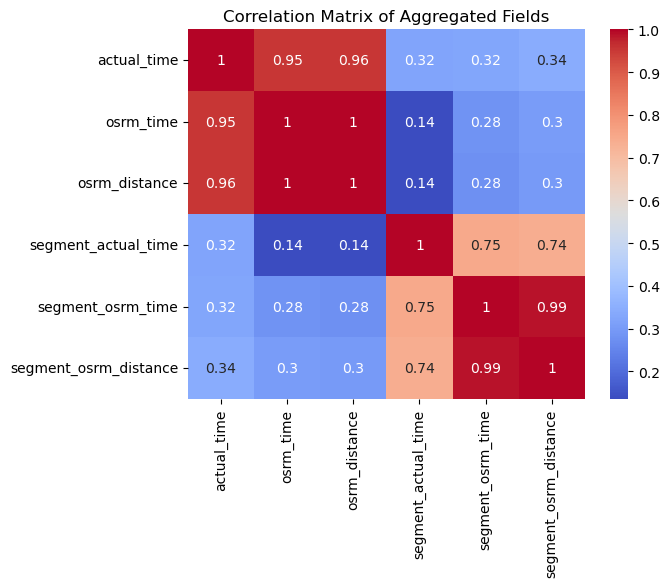

In [9]:
# Example: Correlation matrix for aggregated fields
correlation_matrix = aggregated_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Aggregated Fields')
plt.show()


In [43]:
# Perform one-hot encoding for additional categorical columns (if needed)
data_encoded = pd.get_dummies(data_filled, columns=['additional_categorical_column'])


KeyError: "None of [Index(['additional_categorical_column'], dtype='object')] are in the [columns]"

In [ ]:
# Example: Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = data_encoded.copy()  # Create a copy of the encoded data
data_normalized[numerical_features_to_scale] = scaler.fit_transform(data_encoded[numerical_features_to_scale])


In [12]:
from scipy.stats import ttest_ind

# Split the data into two groups: cutoff and non-cutoff trips
cutoff_trips = data[data['is_cutoff'] == True]
non_cutoff_trips = data[data['is_cutoff'] == False]

# Perform a two-sample t-test to compare the average actual time
t_statistic, p_value = ttest_ind(cutoff_trips['actual_time'], non_cutoff_trips['actual_time'])

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average actual time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average actual time.")


Reject the null hypothesis. There is a significant difference in average actual time.


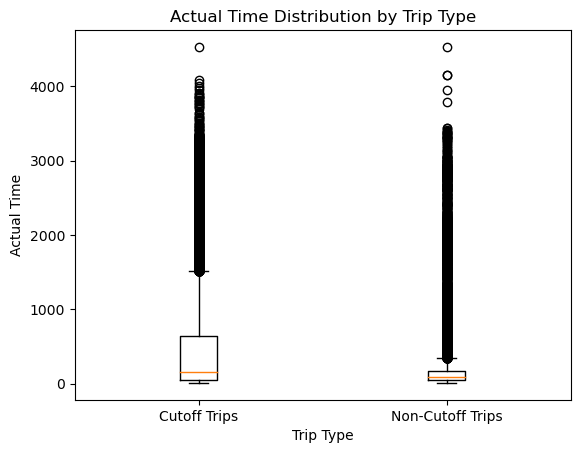

p-value: 0.0


In [13]:
import matplotlib.pyplot as plt

# Create a box plot to compare the distribution of actual times
plt.boxplot([cutoff_trips['actual_time'], non_cutoff_trips['actual_time']], labels=['Cutoff Trips', 'Non-Cutoff Trips'])
plt.xlabel('Trip Type')
plt.ylabel('Actual Time')
plt.title('Actual Time Distribution by Trip Type')
plt.show()

# Report the p-value
print("p-value:", p_value)


In [14]:
# Extract features from Destination Name and Source Name
data['Destination_City'] = data['destination_name'].str.split('_').str[0]
data['Destination_State'] = data['destination_name'].str.split('_').str[-1]
data['Source_City'] = data['source_name'].str.split('_').str[0]
data['Source_State'] = data['source_name'].str.split('_').str[-1]

# Extract features from Trip Creation Time
data['Trip_Year'] = data['trip_creation_time'].dt.year
data['Trip_Month'] = data['trip_creation_time'].dt.month
data['Trip_Day'] = data['trip_creation_time'].dt.day
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,Destination_City,Destination_State,Source_City,Source_State,Trip_Year,Trip_Month,Trip_Day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,Khambhat,D (Gujarat),Anand,DC (Gujarat),2018,9,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,1.111111,Khambhat,D (Gujarat),Anand,DC (Gujarat),2018,9,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,2.285714,Khambhat,D (Gujarat),Anand,DC (Gujarat),2018,9,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,1.750000,Khambhat,D (Gujarat),Anand,DC (Gujarat),2018,9,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,1.200000,Khambhat,D (Gujarat),Anand,DC (Gujarat),2018,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,12.0,8.1858,1.000000,Gurgaon,HB (Haryana),Sonipat,H (Haryana),2018,9,20
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,21.0,17.3725,1.238095,Gurgaon,HB (Haryana),Sonipat,H (Haryana),2018,9,20
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,34.0,20.7053,0.588235,Gurgaon,HB (Haryana),Sonipat,H (Haryana),2018,9,20
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,27.0,18.8885,0.629630,Gurgaon,HB (Haryana),Sonipat,H (Haryana),2018,9,20


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical variables (e.g., route_type)
encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid multicollinearity
encoded_route_type = encoder.fit_transform(data[['route_type']])
encoded_route_type_df = pd.DataFrame(encoded_route_type, columns=encoder.get_feature_names_out(['route_type']))
data_encoded = pd.concat([data, encoded_route_type_df], axis=1)

# Drop the original categorical column
data_encoded.drop(['route_type'], axis=1, inplace=True)

# Normalize or standardize numerical features (e.g., using MinMaxScaler)
scaler = StandardScaler()
numerical_features = ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])



C:\Users\criss\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


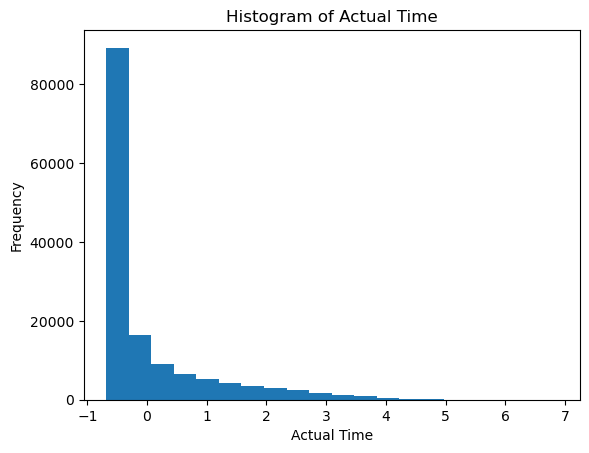

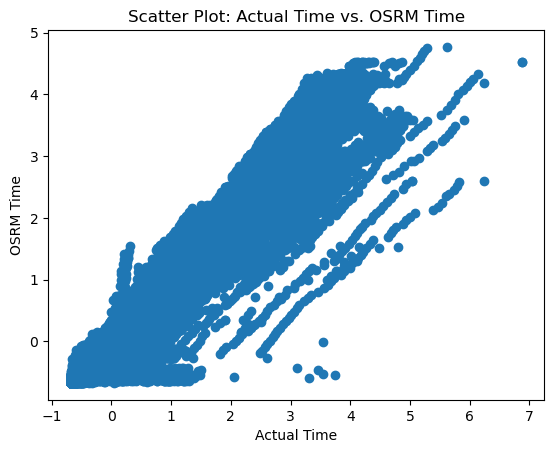

In [16]:
import matplotlib.pyplot as plt

# Example: Histogram for 'actual_time'
plt.hist(data_encoded['actual_time'], bins=20)
plt.xlabel('Actual Time')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Time')
plt.show()

# Example: Scatter plot between 'actual_time' and 'osrm_time'
plt.scatter(data_encoded['actual_time'], data_encoded['osrm_time'])
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.title('Scatter Plot: Actual Time vs. OSRM Time')
plt.show()

# You can create similar visualizations for other numerical features


In [17]:
# Define the numerical columns to check for outliers
numerical_columns = ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the defined numerical columns
data_no_outliers = remove_outliers_iqr(data_encoded, numerical_columns)

# Compare the shape before and after removing outliers
print("Original data shape:", data_encoded.shape)
print("Data shape after removing outliers:", data_no_outliers.shape)


Original data shape: (144853, 31)
Data shape after removing outliers: (94928, 31)


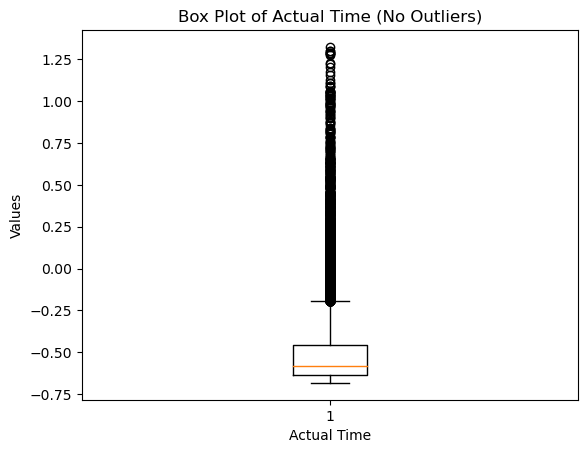

In [18]:
# Example: Box plot for 'actual_time' after outlier removal
plt.boxplot(data_no_outliers['actual_time'])
plt.xlabel('Actual Time')
plt.ylabel('Values')
plt.title('Box Plot of Actual Time (No Outliers)')
plt.show()

# You can create similar visualizations for other numerical features


In [19]:
# Calculate the time taken between 'od_start_time' and 'od_end_time' and create a new feature
data_no_outliers['Time_Taken'] = (data_no_outliers['od_end_time'] - data_no_outliers['od_start_time']).dt.total_seconds()

# Drop the original 'od_start_time' and 'od_end_time' columns if required
data_no_outliers.drop(['od_start_time', 'od_end_time'], axis=1, inplace=True)


In [20]:
# Calculate the difference between 'Time_Taken' and 'start_scan_to_end_scan'
data_no_outliers['Time_Difference'] = data_no_outliers['Time_Taken'] - data_no_outliers['start_scan_to_end_scan']


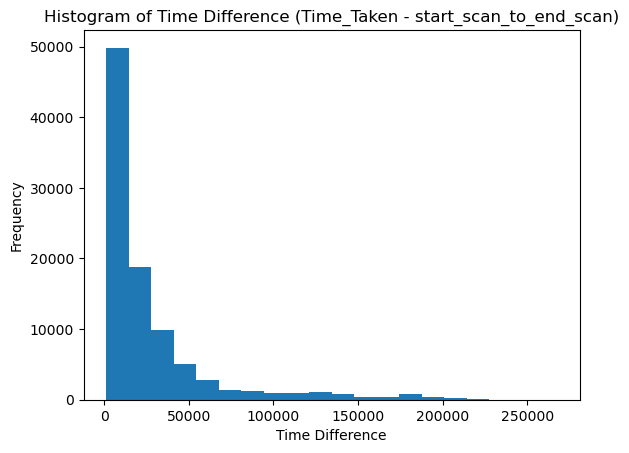

In [21]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of time differences
plt.hist(data_no_outliers['Time_Difference'], bins=20)
plt.xlabel('Time Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Time Difference (Time_Taken - start_scan_to_end_scan)')
plt.show()


In [22]:
from scipy.stats import ttest_1samp

# Perform a one-sample t-test to test if the mean Time_Difference is significantly different from zero
t_statistic, p_value = ttest_1samp(data_no_outliers['Time_Difference'], 0)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between Time_Difference and zero.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between Time_Difference and zero.")


Reject the null hypothesis. There is a significant difference between Time_Difference and zero.


In [23]:
# Group the data by 'trip_uuid' and calculate the mean 'actual_time' and 'OSRM_time'
aggregated_data = data_no_outliers.groupby('trip_uuid').agg({'actual_time': 'mean', 'osrm_time': 'mean'}).reset_index()


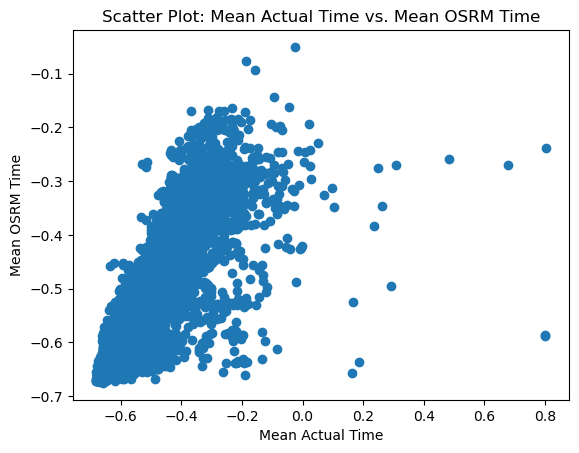

In [24]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between mean 'actual_time' and mean 'OSRM_time'
plt.scatter(aggregated_data['actual_time'], aggregated_data['osrm_time'])
plt.xlabel('Mean Actual Time')
plt.ylabel('Mean OSRM Time')
plt.title('Scatter Plot: Mean Actual Time vs. Mean OSRM Time')
plt.show()


In [25]:
from scipy.stats import ttest_rel

# Perform a paired t-test to compare mean 'actual_time' and mean 'OSRM_time'
t_statistic, p_value = ttest_rel(aggregated_data['actual_time'], aggregated_data['osrm_time'])

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between mean Actual Time and mean OSRM Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between mean Actual Time and mean OSRM Time.")


Reject the null hypothesis. There is a significant difference between mean Actual Time and mean OSRM Time.


In [26]:
# Group the data by 'trip_uuid' and calculate the mean 'actual_time' and 'segment_actual_time'
aggregated_data = data_no_outliers.groupby('trip_uuid').agg({'actual_time': 'mean', 'segment_actual_time': 'mean'}).reset_index()


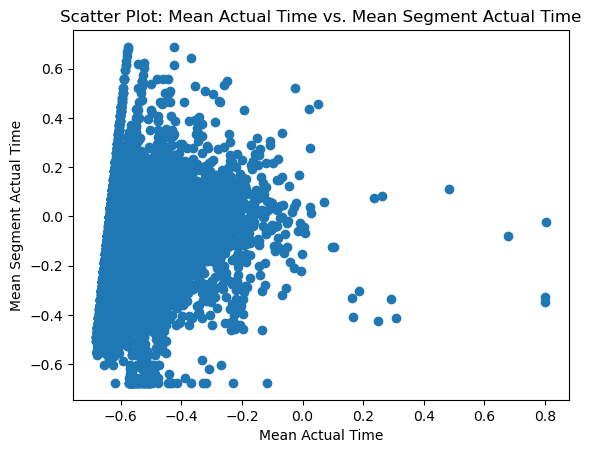

In [27]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between mean 'actual_time' and mean 'segment_actual_time'
plt.scatter(aggregated_data['actual_time'], aggregated_data['segment_actual_time'])
plt.xlabel('Mean Actual Time')
plt.ylabel('Mean Segment Actual Time')
plt.title('Scatter Plot: Mean Actual Time vs. Mean Segment Actual Time')
plt.show()


In [28]:
from scipy.stats import ttest_rel

# Perform a paired t-test to compare mean 'actual_time' and mean 'segment_actual_time'
t_statistic, p_value = ttest_rel(aggregated_data['actual_time'], aggregated_data['segment_actual_time'])

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between mean Actual Time and mean Segment Actual Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between mean Actual Time and mean Segment Actual Time.")


Reject the null hypothesis. There is a significant difference between mean Actual Time and mean Segment Actual Time.


In [29]:
# Group the data by 'trip_uuid' and calculate the mean 'osrm_distance' and 'segment_osrm_distance'
aggregated_data = data_no_outliers.groupby('trip_uuid').agg({'osrm_distance': 'mean', 'segment_osrm_distance': 'mean'}).reset_index()


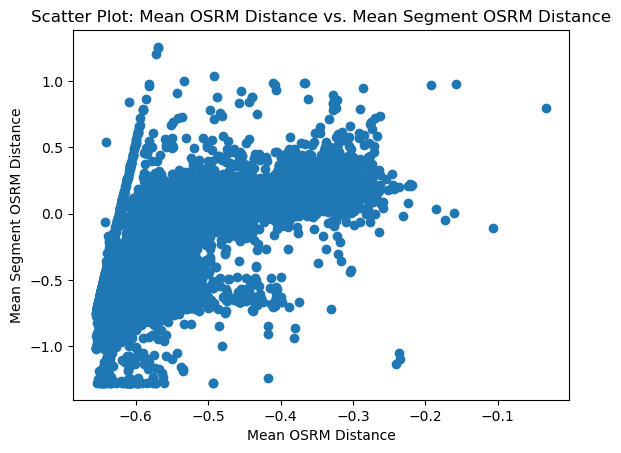

In [30]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between mean 'osrm_distance' and mean 'segment_osrm_distance'
plt.scatter(aggregated_data['osrm_distance'], aggregated_data['segment_osrm_distance'])
plt.xlabel('Mean OSRM Distance')
plt.ylabel('Mean Segment OSRM Distance')
plt.title('Scatter Plot: Mean OSRM Distance vs. Mean Segment OSRM Distance')
plt.show()


In [31]:
from scipy.stats import ttest_rel

# Perform a paired t-test to compare mean 'osrm_distance' and mean 'segment_osrm_distance'
t_statistic, p_value = ttest_rel(aggregated_data['osrm_distance'], aggregated_data['segment_osrm_distance'])

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between mean OSRM Distance and mean Segment OSRM Distance.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between mean OSRM Distance and mean Segment OSRM Distance.")


Reject the null hypothesis. There is a significant difference between mean OSRM Distance and mean Segment OSRM Distance.


In [32]:
# Group the data by 'trip_uuid' and calculate the mean 'osrm_time' and 'segment_osrm_time'
aggregated_data = data_no_outliers.groupby('trip_uuid').agg({'osrm_time': 'mean', 'segment_osrm_time': 'mean'}).reset_index()


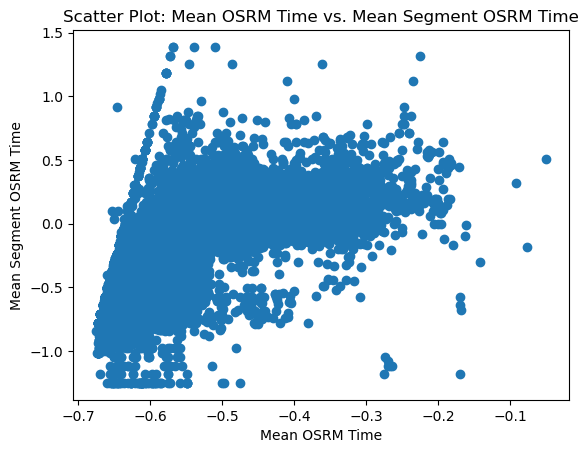

In [33]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between mean 'osrm_time' and mean 'segment_osrm_time'
plt.scatter(aggregated_data['osrm_time'], aggregated_data['segment_osrm_time'])
plt.xlabel('Mean OSRM Time')
plt.ylabel('Mean Segment OSRM Time')
plt.title('Scatter Plot: Mean OSRM Time vs. Mean Segment OSRM Time')
plt.show()


In [34]:
from scipy.stats import ttest_rel

# Perform a paired t-test to compare mean 'osrm_time' and mean 'segment_osrm_time'
t_statistic, p_value = ttest_rel(aggregated_data['osrm_time'], aggregated_data['segment_osrm_time'])

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between mean OSRM Time and mean Segment OSRM Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between mean OSRM Time and mean Segment OSRM Time.")


Reject the null hypothesis. There is a significant difference between mean OSRM Time and mean Segment OSRM Time.


In [35]:
numerical_features = ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']


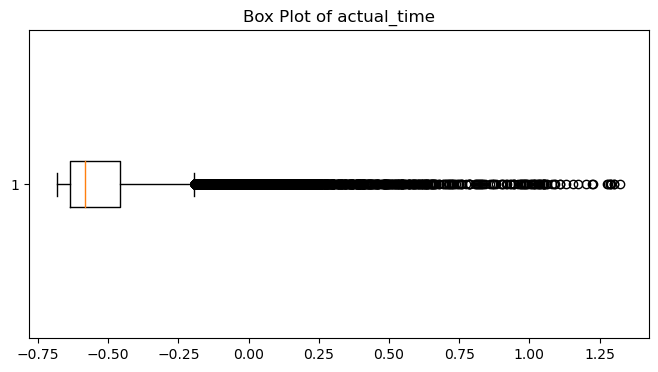

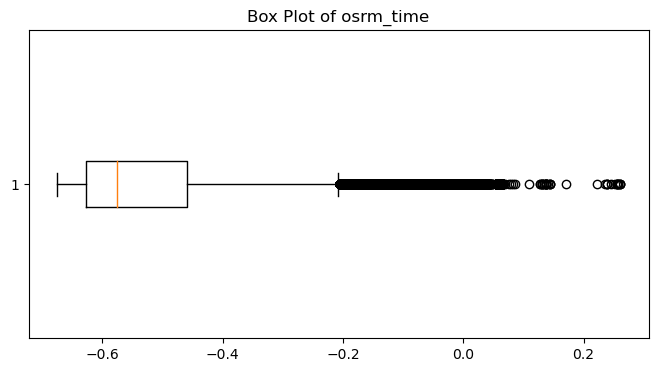

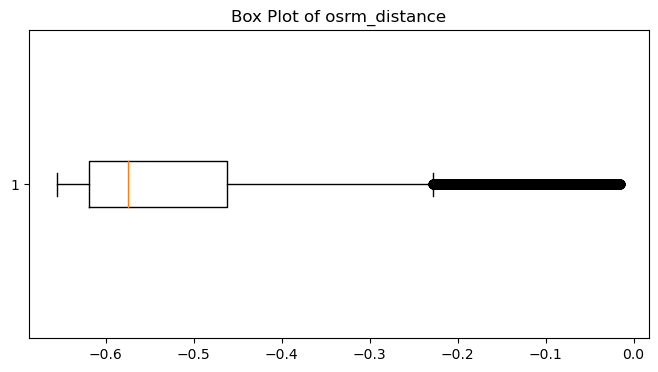

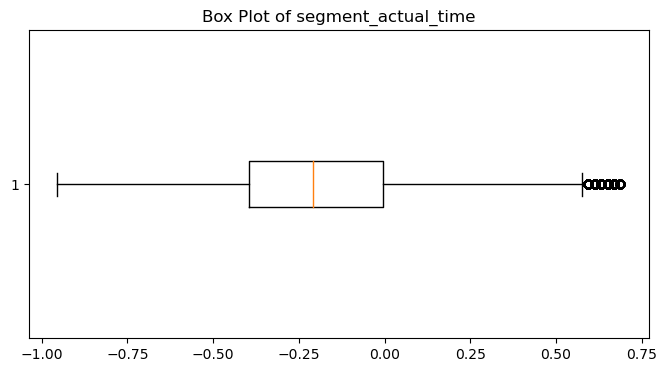

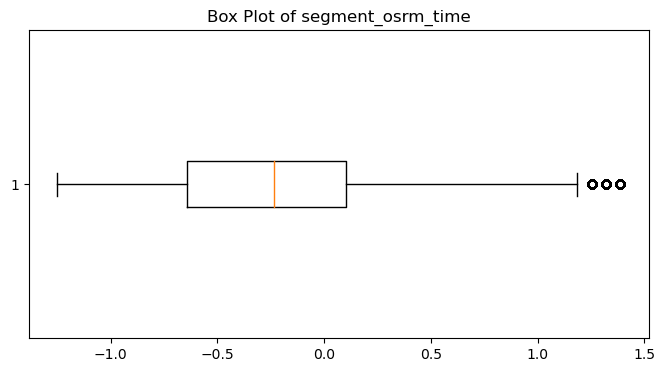

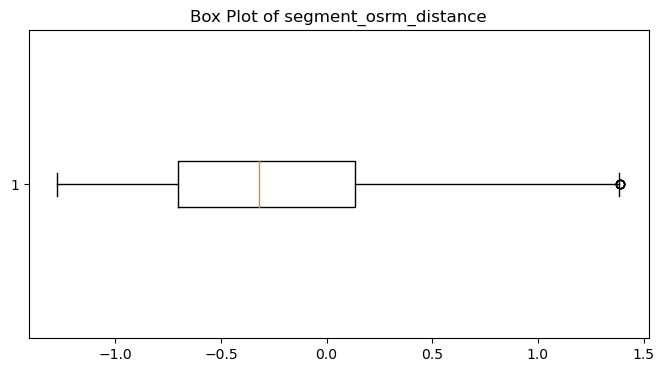

In [36]:
import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data_no_outliers[feature], vert=False)
    plt.title(f'Box Plot of {feature}')
    plt.show()


In [37]:
# Define a function to identify outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for each numerical feature
outliers_dict = {}
for feature in numerical_features:
    outliers_dict[feature] = find_outliers_iqr(data_no_outliers, feature)

# Print the number of outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Number of outliers in {feature}: {outliers.shape[0]}")


Number of outliers in actual_time: 6384
Number of outliers in osrm_time: 7096
Number of outliers in osrm_distance: 7785
Number of outliers in segment_actual_time: 1036
Number of outliers in segment_osrm_time: 599
Number of outliers in segment_osrm_distance: 5


In [38]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Apply the function to remove outliers for each numerical feature
for feature in numerical_features:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, feature)

# Print the shape of the dataset after removing outliers
print("Data shape after removing outliers:", data_no_outliers.shape)


Data shape after removing outliers: (78035, 31)


In [39]:
# Define a function to transform outliers using the IQR method
def transform_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the nearest non-outlier values
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df

# Apply the function to transform outliers for each numerical feature
for feature in numerical_features:
    data_no_outliers = transform_outliers_iqr(data_no_outliers, feature)


In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numerical features you want to normalize
numerical_features_to_scale = ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

# Apply Min-Max scaling to the selected features
data_encoded[numerical_features_to_scale] = scaler.fit_transform(data_encoded[numerical_features_to_scale])

# Display the first few rows of the scaled DataFrame
print(data_encoded.head())



       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid                trip_uuid  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   

  source_center                 source_name destination_center  \
0  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical features you want to standardize
numerical_features_to_scale = ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

# Apply standardization to the selected features
data_encoded[numerical_features_to_scale] = scaler.fit_transform(data_encoded[numerical_features_to_scale])

# Display the first few rows of the standardized DataFrame
print(data_encoded.head())


       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid                trip_uuid  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   

  source_center                 source_name destination_center  \
0  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB